In [12]:
pip install pandas matplotlib scikit-learn openpyxl


Data successfully loaded!
Dataset Columns: ['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score', 'default']


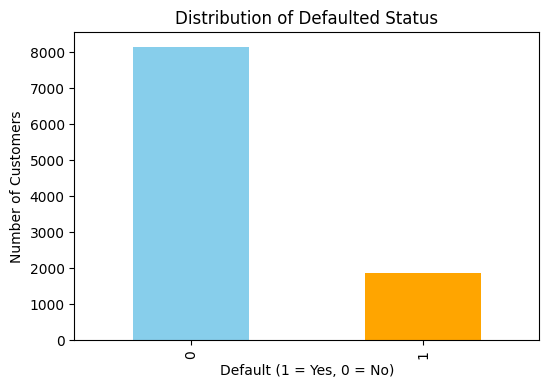


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



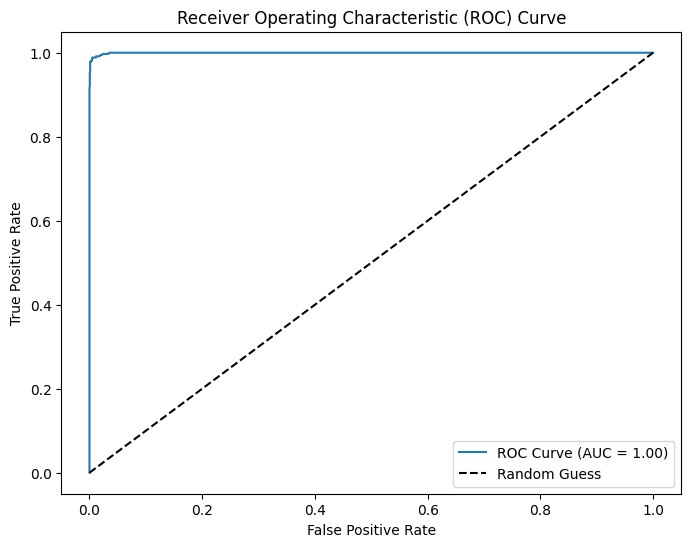

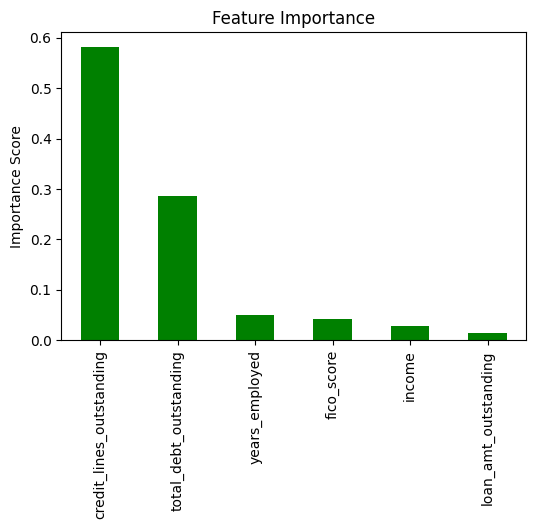

In [13]:
# Loan Default Risk Analysis and Visualization
# By: Nikhil Chandran
# This script predicts and visualizes customer loan default risk using a Random Forest Classifier.

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

# Step 1: Load the dataset
try:
    data = pd.read_excel("/content/Task 3 and 4_Loan_Data.xlsx")
    print("Data successfully loaded!")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Step 2: Inspect and Standardize Column Names
data.columns = data.columns.str.strip().str.lower()  # Standardize column names
print("Dataset Columns:", data.columns.tolist())

# Step 3: Exploratory Data Analysis
# Visualizing the distribution of the target variable (default)
plt.figure(figsize=(6, 4))
data['default'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Defaulted Status')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()

# Step 4: Data Preparation
# Define features and target variable
features = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
target = 'default'
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Model
# Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Visualize the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Step 8: Feature Importance Visualization
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(6, 4))
feature_importances.plot(kind='bar', color='green')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()


# Conclusions and Next Steps


Testing the model on diverse datasets to ensure robustness.
Addressing class imbalance through advanced resampling techniques like SMOTE.
Exploring additional algorithms (e.g., XGBoost) for better performance.
Overall, this project demonstrates the potential of machine learning to address real-world financial challenges and make data-driven decisions.

This project successfully developed a highly accurate loan default prediction model using Random Forest Classifier. The model achieved a 99% accuracy and a perfect ROC-AUC score of 1.00, showcasing its ability to distinguish between default and non-default cases effectively. The feature importance analysis revealed that credit_lines_outstanding and total_debt_outstanding are critical predictors of loan default risk.

Real-World Applications: This model can assist financial institutions in:

*   Identifying high-risk borrowers.
*   Allocating resources for risk mitigation strategies.
*   Automating the credit evaluation process.

Future Directions: While the model performs exceptionally well, further steps can include:

* Testing the model on diverse datasets to ensure robustness.
* Addressing class imbalance through advanced resampling techniques like SMOTE.
* Exploring additional algorithms (e.g., XGBoost) for better performance.

Overall, this project demonstrates the potential of machine learning to address real-world financial challenges and make data-driven decisions.
